In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem import PorterStemmer , WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
nltk.download("stopwords")
nltk.download("words")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to

[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...

[nltk_data]   Package stopwords is already up-to-date!

[nltk_data] Downloading package words to

[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...

[nltk_data]   Package words is already up-to-date!

[nltk_data] Downloading package punkt to

[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...

[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
name_columns = ["Id" , "Entity" , "Target" , "Text"]
df = pd.read_csv(r"C:\Users\Administrator\Downloads\Compressed\twitter_training.csv\twitter_training.csv" ,names= name_columns)
df

,Id,Entity,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
df.describe()

,Id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [5]:
df.shape

(74682, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 74682 entries, 0 to 74681

Data columns (total 4 columns):

 #   Column  Non-Null Count  Dtype 

---  ------  --------------  ----- 

 0   Id      74682 non-null  int64 

 1   Entity  74682 non-null  object

 2   Target  74682 non-null  object

 3   Text    73996 non-null  object

dtypes: int64(1), object(3)

memory usage: 2.3+ MB


In [7]:
df.columns

Index(['Id', 'Entity', 'Target', 'Text'], dtype='object')

In [8]:
df["Text"][17]

'I-Hard like me, RARE LONDON DE, HANDSOME 2011, Borderlands 3 (Xbox) dlvr.it/RMTrgF'

In [9]:
df["Target"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [10]:
df["Target"].value_counts(ascending = True)

Target
Irrelevant    12990
Neutral       18318
Positive      20832
Negative      22542
Name: count, dtype: int64

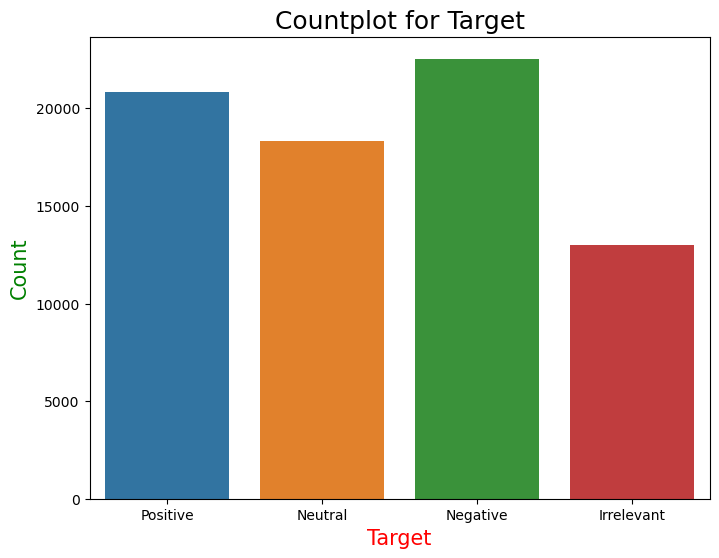

In [11]:
## Countplot for Target

plt.figure(figsize = (8,6))
sns.countplot(x = "Target" , data = df)
plt.title("Countplot for Target" , fontsize = 18 , c="k")
plt.xlabel("Target" , fontsize = 15 , c = "r")
plt.ylabel("Count" , fontsize = 15 , c = "g")
plt.show()

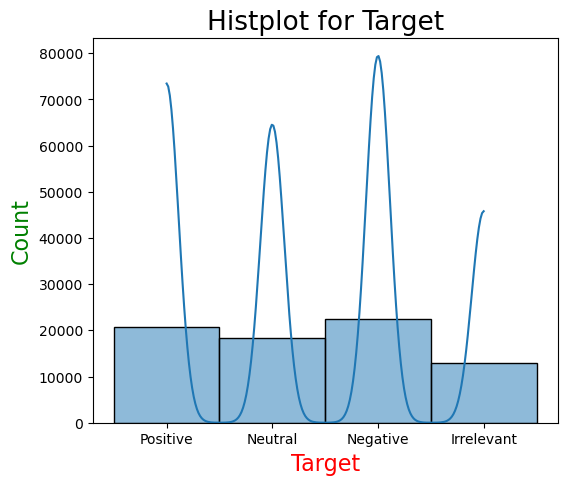

In [12]:
plt.figure(figsize = (6,5))
sns.histplot(x="Target" , kde = True , bins = 30 , data = df)
plt.title("Histplot for Target" , fontsize = 19 , c="k")
plt.xlabel("Target" , fontsize = 16 , c="r")
plt.ylabel("Count" , fontsize = 16 , c="g")
plt.show()

In [13]:
df["Entity"].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [49]:
b = df["Entity"].value_counts(ascending = True)
b

Entity
AssassinsCreed                       2244
RedDeadRedemption(RDR)               2262
PlayerUnknownsBattlegrounds(PUBG)    2274
Fortnite                             2274
Borderlands                          2286
Hearthstone                          2298
Google                               2298
Nvidia                               2298
CS-GO                                2304
Cyberpunk2077                        2304
GrandTheftAuto(GTA)                  2304
PlayStation5(PS5)                    2310
HomeDepot                            2310
Amazon                               2316
johnson&johnson                      2328
Overwatch                            2334
Xbox(Xseries)                        2334
FIFA                                 2340
TomClancysGhostRecon                 2346
Battlefield                          2346
NBA2K                                2352
WorldOfCraft                         2364
Dota2                                2364
Facebook                   

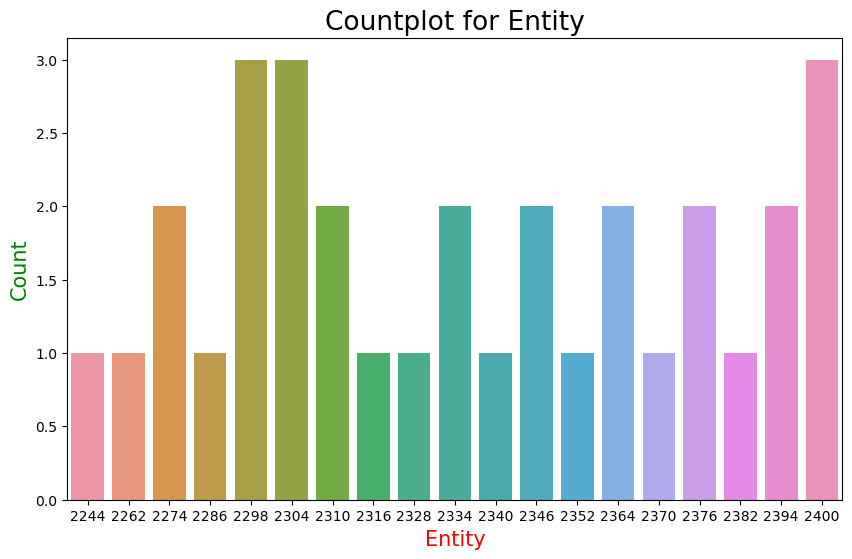

In [52]:
## Count plot for Entity

plt.figure(figsize = (10 , 6))
sns.countplot(x = b , data = df)
plt.title("Countplot for Entity" , fontsize = 19 , c = "k")
plt.xlabel("Entity" , fontsize = 15 , c = "r")
plt.ylabel("Count" , fontsize = 15 , c = "g")
plt.show()

In [56]:
df.groupby("Id")["Entity"].sum()

Id
1                     AmazonAmazonAmazonAmazonAmazonAmazon
2                     AmazonAmazonAmazonAmazonAmazonAmazon
3                     AmazonAmazonAmazonAmazonAmazonAmazon
4                     AmazonAmazonAmazonAmazonAmazonAmazon
5                     AmazonAmazonAmazonAmazonAmazonAmazon
                               ...                        
13196    Xbox(Xseries)Xbox(Xseries)Xbox(Xseries)Xbox(Xs...
13197    Xbox(Xseries)Xbox(Xseries)Xbox(Xseries)Xbox(Xs...
13198    Xbox(Xseries)Xbox(Xseries)Xbox(Xseries)Xbox(Xs...
13199    Xbox(Xseries)Xbox(Xseries)Xbox(Xseries)Xbox(Xs...
13200    Xbox(Xseries)Xbox(Xseries)Xbox(Xseries)Xbox(Xs...
Name: Entity, Length: 12447, dtype: object

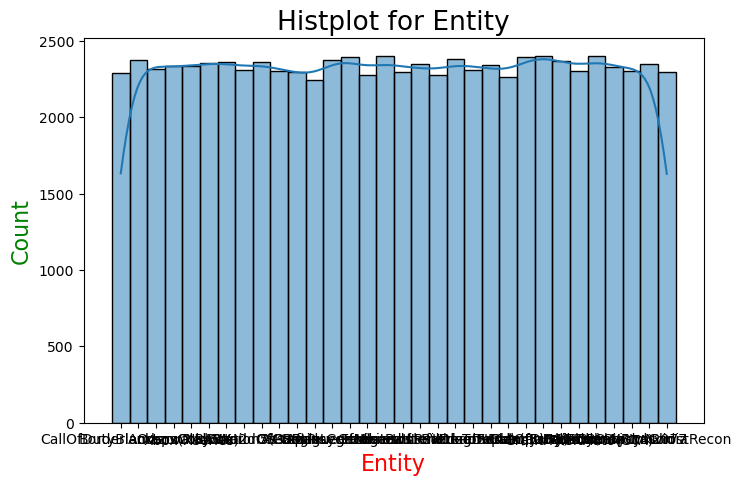

In [59]:
## Histplot for Entity

plt.figure(figsize = (8,5))
sns.histplot(x="Entity" , kde = True , bins = 20  , data = df )
plt.title("Histplot for Entity" , fontsize = 19 , c="k")
plt.xlabel("Entity" , fontsize = 16 , c="r")
plt.ylabel("Count" , fontsize = 16 , c="g")
plt.show()

<Figure size 1000x1000 with 0 Axes>

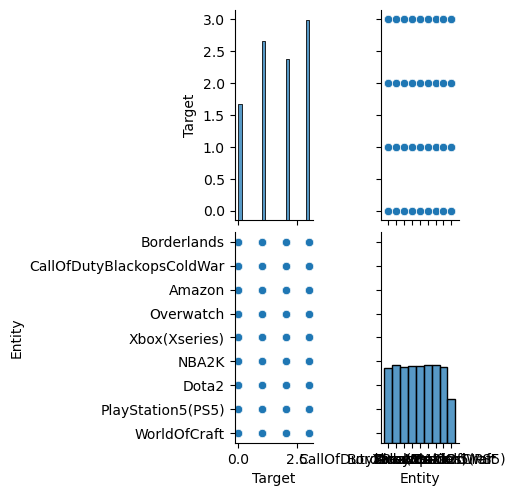

In [53]:
plt.figure(figsize = (10 , 10))
sns.pairplot(df[10:20000] , vars = ["Target" , "Entity"] )
plt.show()

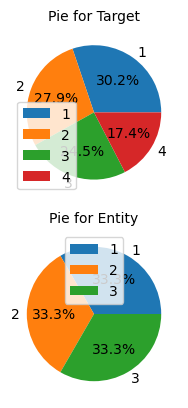

In [18]:
## Pie for Target and Entity columns

y1 = df["Target"].value_counts()
labels = ["1" , "2" , "3" , "4"]
plt.subplot(2,1,1)
plt.pie(y1 , labels = labels , autopct = "%1.1f%%")
plt.legend()
plt.title("Pie for Target" , fontsize = 10 , c = "k")


y2 = df["Entity"].value_counts().head(3)
labels = ["1" , "2" , "3"]
plt.subplot(2,1,2)
plt.pie(y2 , labels = labels , autopct = "%1.1f%%")
plt.legend()
plt.title("Pie for Entity" , fontsize = 10 , c = "k")

plt.show()


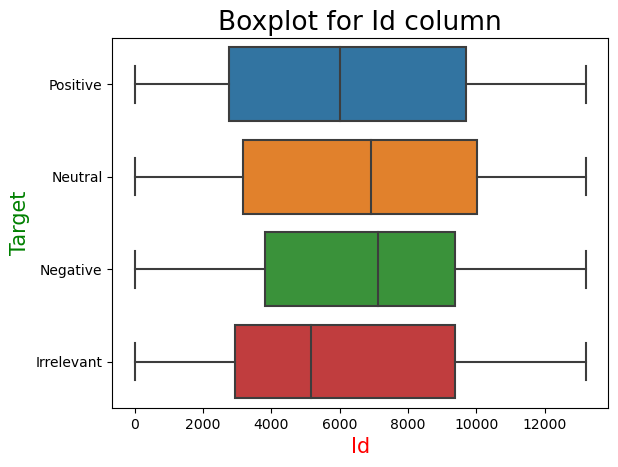

In [19]:
sns.boxplot(data = df , x = "Id" , y = "Target")
plt.xlabel("Id" , fontsize = 15 , c = "r")
plt.ylabel("Target" , fontsize = 15 , c = "g")
plt.title("Boxplot for Id column" , fontsize = 19 , c = "k")
plt.show()

In [20]:
df["Id"].max()

13200

In [21]:
df.isnull().sum()

Id          0
Entity      0
Target      0
Text      686
dtype: int64

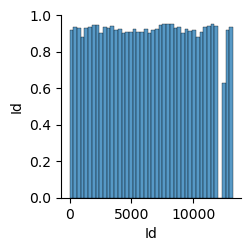

In [22]:
sns.pairplot(df)
plt.show()

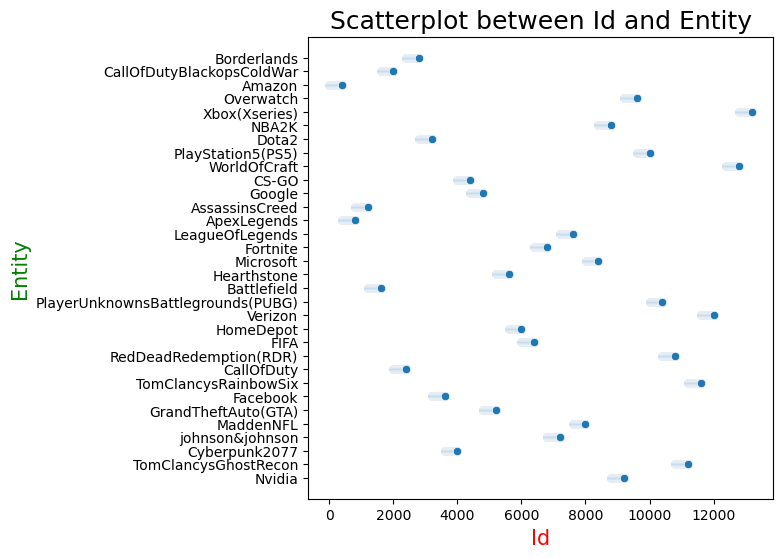

In [23]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = df["Id"] , y = df["Entity"])
plt.xlabel("Id" , fontsize = 15 , c = "r")
plt.ylabel("Entity" , fontsize = 15 , c = "g")
plt.title("Scatterplot between Id and Entity" , fontsize = 18 , c = "k")
plt.show()

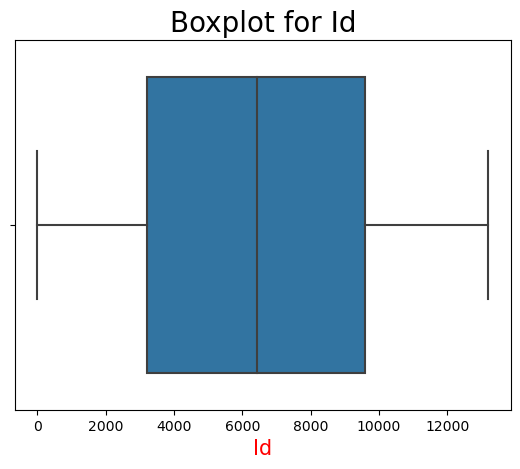

In [64]:
## Boxplot for Id

sns.boxplot(x = "Id" , data =df)
plt.xlabel("Id" , fontsize = 15 , c = "r")
plt.title("Boxplot for Id" , fontsize = 20 , c = "k")
plt.show()

In [24]:
df["Text"].value_counts()

Text
At the same time, despite the fact that there are currently some 100 million people living below the poverty line, most of them do not have access to health services and do not have access to health care, while most of them do not have access to health care.    172
It is not the first time that the EU Commission has taken such a step.                                                                                                                                                                                                172
                                                                                                                                                                                                                                                                      172
<unk>                                                                                                                                                                                                

In [25]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
74677    False
74678    False
74679    False
74680    False
74681    False
Length: 74682, dtype: bool

In [26]:
df.duplicated().sum()

2700

Process missing values

In [27]:
## process missing values in text

df["Text"].fillna("unknown" , inplace = True)

df["Text"].replace("" , inplace = True)


Preprocessing on Text

In [28]:
## preprocessing text

def process_Text(Text):
    
    ## transform text to lowercase
    Text = Text.lower()
    
    ## remove punctuations
    Text = re.sub(r"[^\w\s]" , "" , Text)
    
    ## remove numbers
    Text = re.sub(r"\d+" , "" , Text)
    
    ## split text into tokens
    tokens = word_tokenize(Text)
    
    ## remove stopwords
    stop_words = set(stopwords.words("English"))
    tokens = [word for word in tokens if word not in stop_words]
    
    ## Stemmer
    stemmer = PorterStemmer()
    stemme_tokens = [stemmer.stem(token) for token in tokens]
    
    ## Lemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatize_tokens = [lemmatizer.lemmatize(token) for token in stemme_tokens]
    
    return " ".join(lemmatize_tokens)


In [29]:
df["processed_Text"] = df["Text"].apply(process_Text)

In [30]:
df["processed_Text"]

0                                 im get borderland murder
1                                         come border kill
2                                   im get borderland kill
3                                im come borderland murder
4                                 im get borderland murder
                               ...                        
74677    realiz window partit mac like year behind nvid...
74678    realiz mac window partit year behind nvidia dr...
74679    realiz window partit mac year behind nvidia dr...
74680    realiz window partit mac like year behind nvid...
74681    like window partit mac like year behind driver...
Name: processed_Text, Length: 74682, dtype: object

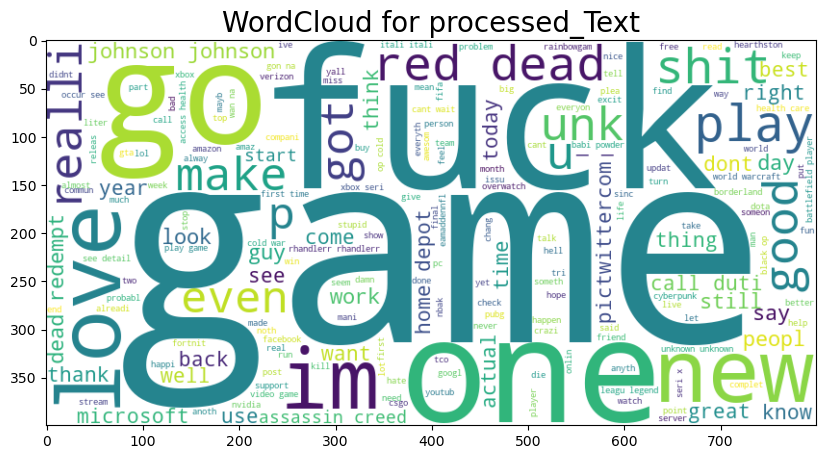

In [47]:
## wordcloud
all_text = " ".join(df["processed_Text"].astype(str))
wordcloud = WordCloud(height = 400 , width = 800 , background_color = "white").generate(all_text)
plt.figure(figsize = (10,5))
plt.title("WordCloud for processed_Text" , fontsize = 20 , c = "k")
plt.imshow(wordcloud , interpolation = "bilinear")
plt.show()

In [31]:
df["processed_Text"][17]

'ihard like rare london de handsom borderland xbox dlvritrmtrgf'

In [32]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()

df["Target"] = Encoder.fit_transform(df["Target"])
df["Target"]

0        3
1        3
2        3
3        3
4        3
        ..
74677    3
74678    3
74679    3
74680    3
74681    3
Name: Target, Length: 74682, dtype: int32

In [33]:
df["Target"].unique()

array([3, 2, 1, 0])

In [34]:
## convert Text to Vector

count_vector = CountVectorizer(max_features = 5000)
x_count = count_vector.fit_transform(df["processed_Text"])
x_count

<74682x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 662486 stored elements in Compressed Sparse Row format>

In [35]:
x_count_dense = x_count.toarray()
x_count_dense

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
df["Target"].unique()

array([3, 2, 1, 0])

In [37]:
df.head(10).style.background_gradient(cmap = "Blues")

,Id,Entity,Target,Text,processed_Text
0,2401,Borderlands,3,"im getting on borderlands and i will murder you all ,",im get borderland murder
1,2401,Borderlands,3,"I am coming to the borders and I will kill you all,",come border kill
2,2401,Borderlands,3,"im getting on borderlands and i will kill you all,",im get borderland kill
3,2401,Borderlands,3,"im coming on borderlands and i will murder you all,",im come borderland murder
4,2401,Borderlands,3,"im getting on borderlands 2 and i will murder you me all,",im get borderland murder
5,2401,Borderlands,3,"im getting into borderlands and i can murder you all,",im get borderland murder
6,2402,Borderlands,3,So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg,spent hour make someth fun dont know huge borderland fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pictwittercommlsiwfjg
7,2402,Borderlands,3,"So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here's the original picture compared to the creation I made:) Have fun! pic.twitter.com / mLsI5wf9Jg",spent coupl hour someth fun dont know im huge borderland fan maya one favorit charact decid make wallpap pc here origin pictur compar creation made fun pictwittercom mlsiwfjg
8,2402,Borderlands,3,So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my favorite characters.,spent hour someth fun dont know im huge borderland fan maya one favorit charact
9,2402,Borderlands,3,So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg,spent hour make someth fun dont know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pictwittercommlsiwfjg


In [38]:
data = df.drop("Text" , axis = 1)
data

,Id,Entity,Target,processed_Text
0,2401,Borderlands,3,im get borderland murder
1,2401,Borderlands,3,come border kill
2,2401,Borderlands,3,im get borderland kill
3,2401,Borderlands,3,im come borderland murder
4,2401,Borderlands,3,im get borderland murder
...,...,...,...,...
74677,9200,Nvidia,3,realiz window partit mac like year behind nvid...
74678,9200,Nvidia,3,realiz mac window partit year behind nvidia dr...
74679,9200,Nvidia,3,realiz window partit mac year behind nvidia dr...
74680,9200,Nvidia,3,realiz window partit mac like year behind nvid...


Split Data to X and y

In [39]:
X = x_count_dense[:3000]

y = df["Target"][:3000]

In [40]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , 
                                                      shuffle = True , random_state = 42)

In [41]:
print("x_train shape" , x_train.shape)
print("x_test shape" , x_test.shape)
print("y_train shape" , y_train.shape)
print("y_test shape" , y_test.shape)

x_train shape (2400, 5000)

x_test shape (600, 5000)

y_train shape (2400,)

y_test shape (600,)


Build Models

random_forest_score 0.9754166666666667

accuracy_rf : 0.9116666666666666

report               precision    recall  f1-score   support



           0       0.96      0.87      0.92        93

           1       0.90      0.92      0.91       118

           2       0.94      0.90      0.92       144

           3       0.88      0.93      0.91       245



    accuracy                           0.91       600

   macro avg       0.92      0.90      0.91       600

weighted avg       0.91      0.91      0.91       600



cm_rf : [[ 81   0   3   9]

 [  0 108   0  10]

 [  1   3 129  11]

 [  2   9   5 229]]


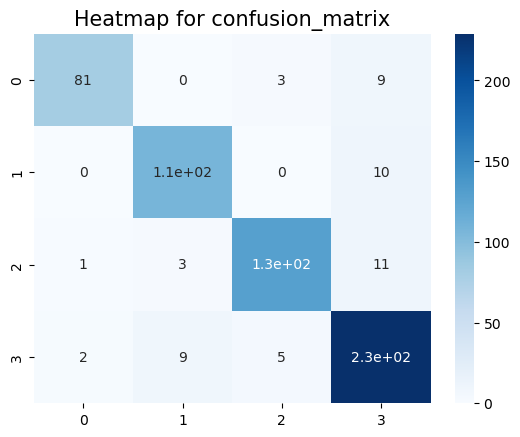

****************************************************

decision_tree_score 0.9754166666666667

accuracy_dt : 0.845

report               precision    recall  f1-score   support



           0       0.87      0.85      0.86        93

           1       0.86      0.81      0.83       118

           2       0.87      0.81      0.84       144

           3       0.82      0.88      0.85       245



    accuracy                           0.84       600

   macro avg       0.85      0.84      0.84       600

weighted avg       0.85      0.84      0.84       600



cm_dt : [[ 79   1   1  12]

 [  3  95   6  14]

 [  1   4 117  22]

 [  8  10  11 216]]


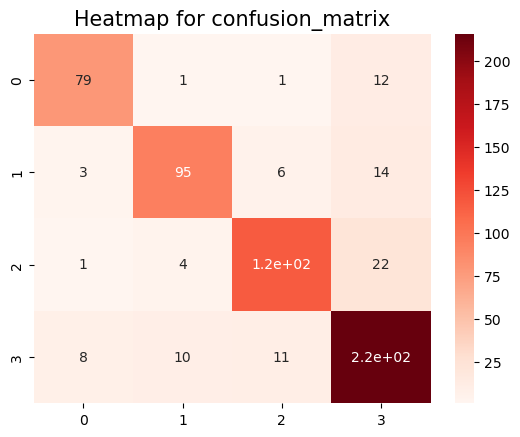

***********************************************************

naive_bayes_score 0.8875

accuracy_nb : 0.8033333333333333

report               precision    recall  f1-score   support



           0       0.98      0.67      0.79        93

           1       0.90      0.76      0.83       118

           2       0.86      0.66      0.75       144

           3       0.72      0.96      0.82       245



    accuracy                           0.80       600

   macro avg       0.87      0.76      0.80       600

weighted avg       0.83      0.80      0.80       600



cm_nb : [[ 62   3   4  24]

 [  0  90   5  23]

 [  0   4  95  45]

 [  1   3   6 235]]


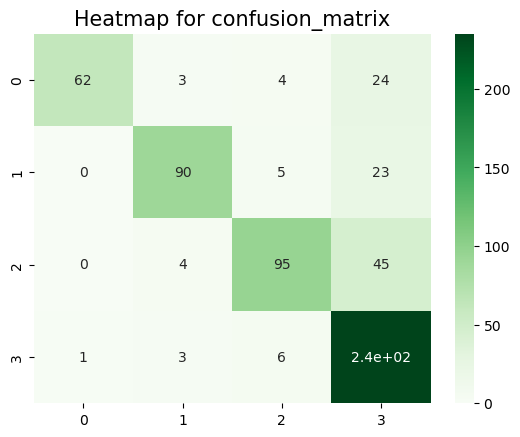

In [42]:
## RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train , y_train)
## score for randomforest
random_forest_score = random_forest.score(x_train , y_train)
print("random_forest_score" , random_forest_score)
## y_pred
y_pred_random_forest = random_forest.predict(x_test)
## accuracy for randomforest
accuracy_rf = accuracy_score(y_test , y_pred_random_forest)
print("accuracy_rf :" , accuracy_rf)
## classification_report
report = classification_report(y_test , y_pred_random_forest)
print("report" , report)
## confusion_matrix
cm_rf = confusion_matrix(y_test , y_pred_random_forest)
print("cm_rf :" , cm_rf)
## plot confusion_matrix
sns.heatmap(cm_rf , annot = True , cmap = "Blues")
plt.title("Heatmap for confusion_matrix" , fontsize = 15 , c = "k")
plt.show()

print("****************************************************")


## DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train , y_train)
## score for decisiontree
decision_tree_score = decision_tree.score(x_train , y_train)
print("decision_tree_score" , decision_tree_score)
## y_pred
y_pred_decision_tree = decision_tree.predict(x_test)
## accuracy for decisiontree
accuracy_dt = accuracy_score(y_test , y_pred_decision_tree)
print("accuracy_dt :" , accuracy_dt)
## classification_report
report = classification_report(y_test , y_pred_decision_tree)
print("report" , report)
## confusion_matrix
cm_dt = confusion_matrix(y_test , y_pred_decision_tree)
print("cm_dt :" , cm_dt)
## plot confusion_matrix
sns.heatmap(cm_dt , annot = True , cmap = "Reds")
plt.title("Heatmap for confusion_matrix" , fontsize = 15 , c = "k")
plt.show()

print("***********************************************************")


## Naive_bayes

naive_bayes = MultinomialNB()
naive_bayes.fit(x_train , y_train)
## score for naive_bayes
naive_bayes_score = naive_bayes.score(x_train , y_train)
print("naive_bayes_score" , naive_bayes_score)
## y_pred
y_pred_naive_bayes = naive_bayes.predict(x_test)
## accuracy for naive_bayes
accuracy_nb = accuracy_score(y_test , y_pred_naive_bayes)
print("accuracy_nb :" , accuracy_nb)
## classification_report
report = classification_report(y_test , y_pred_naive_bayes)
print("report" , report)
## confusion_matrix
cm_nb = confusion_matrix(y_test , y_pred_naive_bayes)
print("cm_nb :" , cm_nb)
## plot confusion_matrix
sns.heatmap(cm_nb , annot = True , cmap = "Greens")
plt.title("Heatmap for confusion_matrix" , fontsize = 15 , c = "k")
plt.show()



Predict Model

In [89]:
def predict_sentiment(Text):
    processed_Text = process_Text(Text)

    # Transform the preprocessed text into CountVectorizer vectors
    X_new = count_vector.transform([processed_Text])

    # Make predictions
    predicted_sentiment = random_forest.predict(X_new)

    # Print the predicted sentiment
    print("Predicted sentiment:", predicted_sentiment)


In [90]:
predict_sentiment("i love this film")

Predicted sentiment: [3]


In [91]:
predict_sentiment("i hate this film")

Predicted sentiment: [1]


In [92]:
predict_sentiment("office is closed at 12 pm")

Predicted sentiment: [2]


In [95]:
predict_sentiment("all thing is good")

Predicted sentiment: [3]


# By: Jana Ashraf